##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [112]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [113]:
# Can have as many cells as you want for code
import pandas as pd
#filepath = "./data/catA_train.csv" 
#df = pd.read_csv(filepath)
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

df2 = pd.read_csv(r"C:\Users\Desmond\Downloads\catA_train.csv")

In [114]:
# Remove rows where the Company Status is 'Inactive'
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']
# removes rows without either lat or long coordinates
df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE"])





In [115]:

df2.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361,Employment Agencies,73610000,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0,0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449,"Water Transportation of Freight, Not Elsewhere...",44490000,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0,0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1,0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0,0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1,1


In [116]:
df2 = df2.dropna(subset=["Year Found"])
currentyear = 2024
df2["company age"] = currentyear - df2["Year Found"]

df2.isna().sum()


LATITUDE                                   0
LONGITUDE                                  0
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                                 0
Entity Type                                0
Parent Company                           502
Parent Country                           508
Ownership Type                             0
Company Description                        0
Square Footage                         28632
Company Status (Active/Inactive)           0
Employees (Single Site)                12231
Employees (Domestic Ultimate Total)       74
Employees (Global Ultimate Total)       2738
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22062
Fiscal Yea

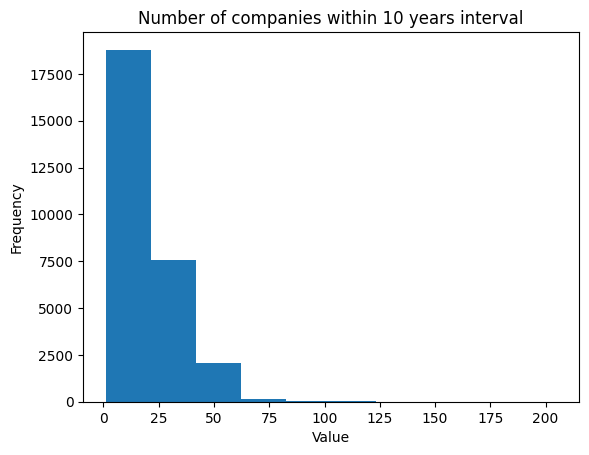

In [117]:
import matplotlib.pyplot as plt

plt.hist(df2["company age"], bins=10)
plt.title("Number of companies within 10 years interval")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

(0.0, 1000000000.0)

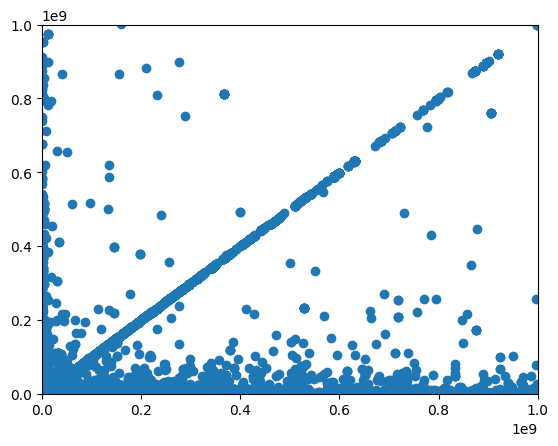

In [118]:
X = df2["Sales (Global Ultimate Total USD)"]
Y = df2["Sales (Domestic Ultimate Total USD)"]

plt.scatter(X,Y)

plt.xlim([0, 1E+09])  # Set limits for X-axis
plt.ylim([0, 1E+09])  # Set limits for Y-axis

Text(0, 0.5, 'Domestic Sales (USD)')

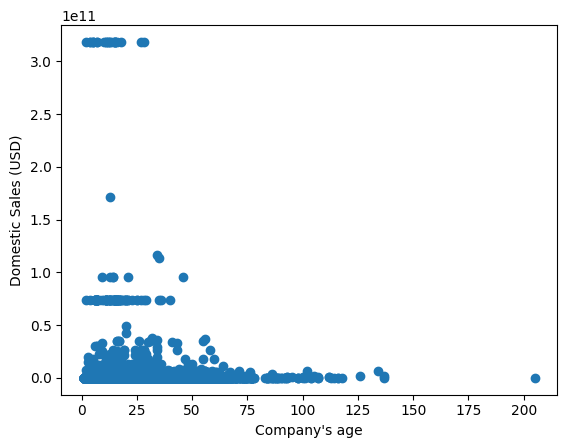

In [119]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

X = df2["company age"]
Y = df2["Sales (Domestic Ultimate Total USD)"]

plt.scatter(X,Y)
plt.xlabel("Company's age")
plt.ylabel("Domestic Sales (USD)")
#plt.xscale('log')
#plt.yscale('log')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [138]:

X = df2["company age"].values.reshape(-1, 1)
Y = df2["Sales (Domestic Ultimate Total USD)"]

model = LinearRegression()
model.fit(X, Y)

# You can access coefficients and intercept
coef = model.coef_
intercept = model.intercept_



# Making predictions using the model
Y_pred = model.predict(X)

# Calculating Mean Squared Error
mse = mean_squared_error(Y, Y_pred)

print("Mean Squared Error:", mse)


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def regression_summary(X, Y, model):
    Y_pred = model.predict(X)
    mse = mean_squared_error(Y, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y, Y_pred)
    n = len(X)
    p = X.shape[1]  # number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)
    print("Adjusted R-squared:", adjusted_r2)

# Use the function
regression_summary(X, Y, model)


Mean Squared Error: 1.0591526659352855e+20
Coefficients: [-11137725.12373911]
Intercept: 979045159.1953623
Mean Squared Error: 1.0591526659352855e+20
Root Mean Squared Error: 10291514300.312105
R-squared: 0.00021246171152211613
Adjusted R-squared: 0.00017754073568243545


### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [139]:
###...code...###

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [140]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [141]:
df3 = df2.dropna(subset=["Sales (Domestic Ultimate Total USD)"])

del df2["Square Footage"]






df2.isna().sum()

KeyError: 'Square Footage'

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Added for data checks

# Assuming df2 is your correct DataFrame and already imported

# Separate features and target variable
X = df2.drop("Sales (Domestic Ultimate Total USD)", axis=1)
y = df2["Sales (Domestic Ultimate Total USD)"]

# Check for common data issues
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())
print("Non-numeric types in X:", X.select_dtypes(exclude=[np.number]).columns.tolist())
print("Infinite values in X:", np.isinf(X.values).sum())
print("Infinite values in y:", np.isinf(y.values).sum())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Missing values in X: 62067
Missing values in y: 0
Non-numeric types in X: ['AccountID', 'Company', 'Industry', '8-Digit SIC Description', 'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type', 'Company Description', 'Company Status (Active/Inactive)', 'Import/Export Status', 'Fiscal Year End', 'Global Ultimate Company', 'Global Ultimate Country', 'Domestic Ultimate Company']


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!